# Salary Prediction

>**Note**: 

```
- Late submissions are penalized.
- Only GitHub submissions are acceptable.
```

## Name: Esther Awuzie

<br>

## Please show and display ALL your calculations and results.
> Remember to read the **`instructions`** carefully.

In [1]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Built-in library
import itertools
import re
import json
from typing import Union, Optional, Sequence

# pandas settings
pd.options.display.max_rows = 1_000
pd.options.display.max_columns = 1_000
pd.options.display.max_colwidth = 2_000

# Black code formatter (Optional)
%load_ext nb_black

<IPython.core.display.Javascript object>

> The data can be found [here](https://drive.google.com/file/d/1_c3KA14xQC02K0QZ4cpi1emjdz0rqHzb/view?usp=share_link).

### Data Dictionary

```
- Age: continuous.

- Workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

- Final_weight: continuous.

- Education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, - Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

- Education_num: continuous.

- Marital_status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, - Married-AF-spouse.

- Occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

- Relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

- Race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

- Genger: Female, Male.

- Capital_gain: continuous.

- Capital_loss: continuous.

- Hours_per_week: continuous.

- Country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

- Salary: 
```

### Objective

```
Predict whether a person makes over 50K a year.

```



###  Qs 1. Build a machine learning model that predicts the salary.

###  Qs 2. Evaluate the performance of your model using at least three (3) performance metrics.

<hr>

## Note: 

- The assignment **should** be submitted through a `public` GitHub repository.

In [2]:
def load_the_data(*, filename: str) -> pd.DataFrame:
    """This loads the data
    
    Params;
        filename (str): The filepath.

    Returns:
        data (pd.DataFrame): The loaded dataframe."""

    data = pd.read_csv(filename)
    print(f"Shape of the data : {data.shape}\n")

    return data


def remove_weird_values(
    *, data: pd.DataFrame, column: str, first: list, sec: str
) -> pd.DataFrame:
    data[column] = data[column].replace(first, sec)


def join_values_in_a_column(
    *, data: pd.DataFrame, column: str, keep: list, replace: str
) -> pd.DataFrame:
    data[column] = np.where(data[column].isin(keep), data[column], replace)


def discretize_feature(
    *, data: pd.DataFrame, feature: str, num_bins: int, labels: list
) -> pd.Series:
    """This is used to discretize a feature using equal frequency discretization.

    Params:
        data (pd.DataFrame): The input DataFrame.
        feature (str): The feature name.
        num_bins (int): The desired number of bins/categories.
        labels (list[Union[str, int]]): The label names.

    Returns:
        binned_feature (pd.Series): The binned feature.
    """

    data[feature] = pd.qcut(
        x=data[feature], q=num_bins, labels=labels, duplicates="drop"
    )

    return data[feature]

<IPython.core.display.Javascript object>

In [3]:
data = load_the_data(filename="salary.csv")
data

Shape of the data : (32560, 15)



,Age,Workclass,Final_weight,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Country,Salary
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


<IPython.core.display.Javascript object>

In [4]:
# Checking for null values

data.isna().sum()

Age               0
Workclass         0
Final_weight      0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Country           0
Salary            0
dtype: int64

<IPython.core.display.Javascript object>

In [5]:
data.describe()

,Age,Final_weight,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


<IPython.core.display.Javascript object>

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Final_weight    32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Country         32560 non-null  object
 14  Salary          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


<IPython.core.display.Javascript object>

In [7]:
# A simple check for row duplication
data.duplicated().sum()

24

<IPython.core.display.Javascript object>

In [8]:
# Dropping duplicates
data = data.drop_duplicates()

<IPython.core.display.Javascript object>

In [9]:
data.head()

,Age,Workclass,Final_weight,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Country,Salary
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


<IPython.core.display.Javascript object>

In [10]:
data["Education"].value_counts(), data["Education_num"].value_counts()

( HS-grad         10494
  Some-college     7282
  Bachelors        5352
  Masters          1722
  Assoc-voc        1382
  11th             1175
  Assoc-acdm       1067
  10th              933
  7th-8th           645
  Prof-school       576
  9th               514
  12th              433
  Doctorate         413
  5th-6th           332
  1st-4th           166
  Preschool          50
 Name: Education, dtype: int64,
 9     10494
 10     7282
 13     5352
 14     1722
 11     1382
 7      1175
 12     1067
 6       933
 4       645
 15      576
 5       514
 8       433
 16      413
 3       332
 2       166
 1        50
 Name: Education_num, dtype: int64)

<IPython.core.display.Javascript object>

Dropping the Education column, since that column and the Education_num column are the same.

In [11]:
data = data.drop(columns="Education")

<IPython.core.display.Javascript object>

In [12]:
data["Salary"].value_counts(normalize=True).mul(100)

 <=50K    75.906688
 >50K     24.093312
Name: Salary, dtype: float64

<IPython.core.display.Javascript object>

In [13]:
data_num = data.select_dtypes(include=["float64", "int64"])
data_num

,Age,Final_weight,Education_num,Capital_gain,Capital_loss,Hours_per_week
0,50,83311,13,0,0,13
1,38,215646,9,0,0,40
2,53,234721,7,0,0,40
3,28,338409,13,0,0,40
4,37,284582,14,0,0,40
...,...,...,...,...,...,...
32555,27,257302,12,0,0,38
32556,40,154374,9,0,0,40
32557,58,151910,9,0,0,40
32558,22,201490,9,0,0,20


<IPython.core.display.Javascript object>

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Final_weight'}>],
       [<AxesSubplot:title={'center':'Education_num'}>,
        <AxesSubplot:title={'center':'Capital_gain'}>],
       [<AxesSubplot:title={'center':'Capital_loss'}>,
        <AxesSubplot:title={'center':'Hours_per_week'}>]], dtype=object)

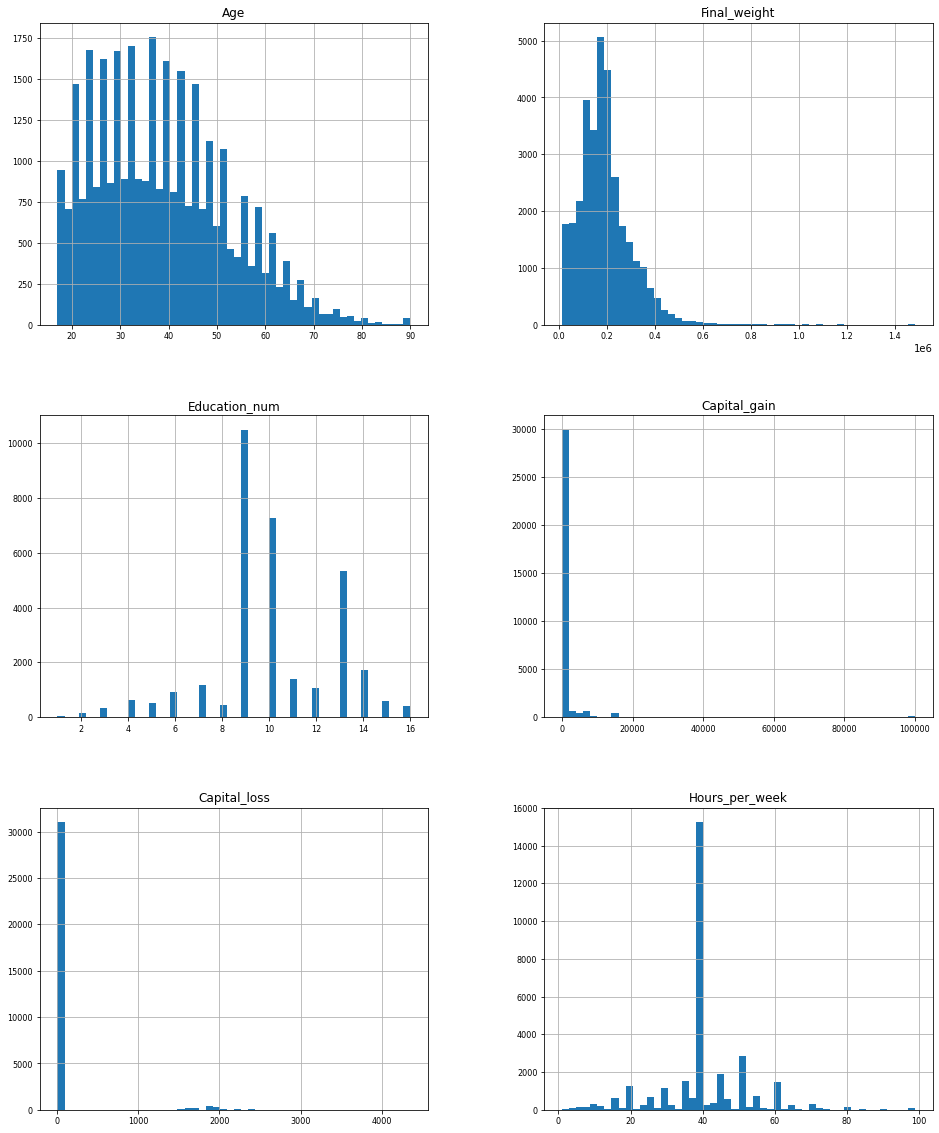

<IPython.core.display.Javascript object>

In [14]:
# Now plotting the distribution for all the numerical features.

data_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

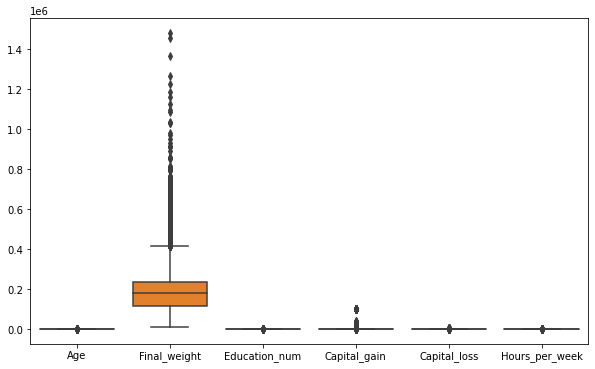

<IPython.core.display.Javascript object>

In [15]:
fig = plt.subplots(figsize=(10, 6))
sns.boxplot(data=data_num)
plt.show()

In [16]:
data_cat = data.select_dtypes(exclude=["float64", "int64"])
data_cat

,Workclass,Marital_status,Occupation,Relationship,Race,Sex,Country,Salary
0,Self-emp-not-inc,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
1,Private,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
2,Private,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
3,Private,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
4,Private,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States,<=50K
...,...,...,...,...,...,...,...,...
32555,Private,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
32556,Private,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
32557,Private,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
32558,Private,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


<IPython.core.display.Javascript object>

In [17]:
feat = [
    "Workclass",
    "Marital_status",
    "Occupation",
    "Relationship",
    "Race",
    "Sex",
    "Country",
]

<IPython.core.display.Javascript object>

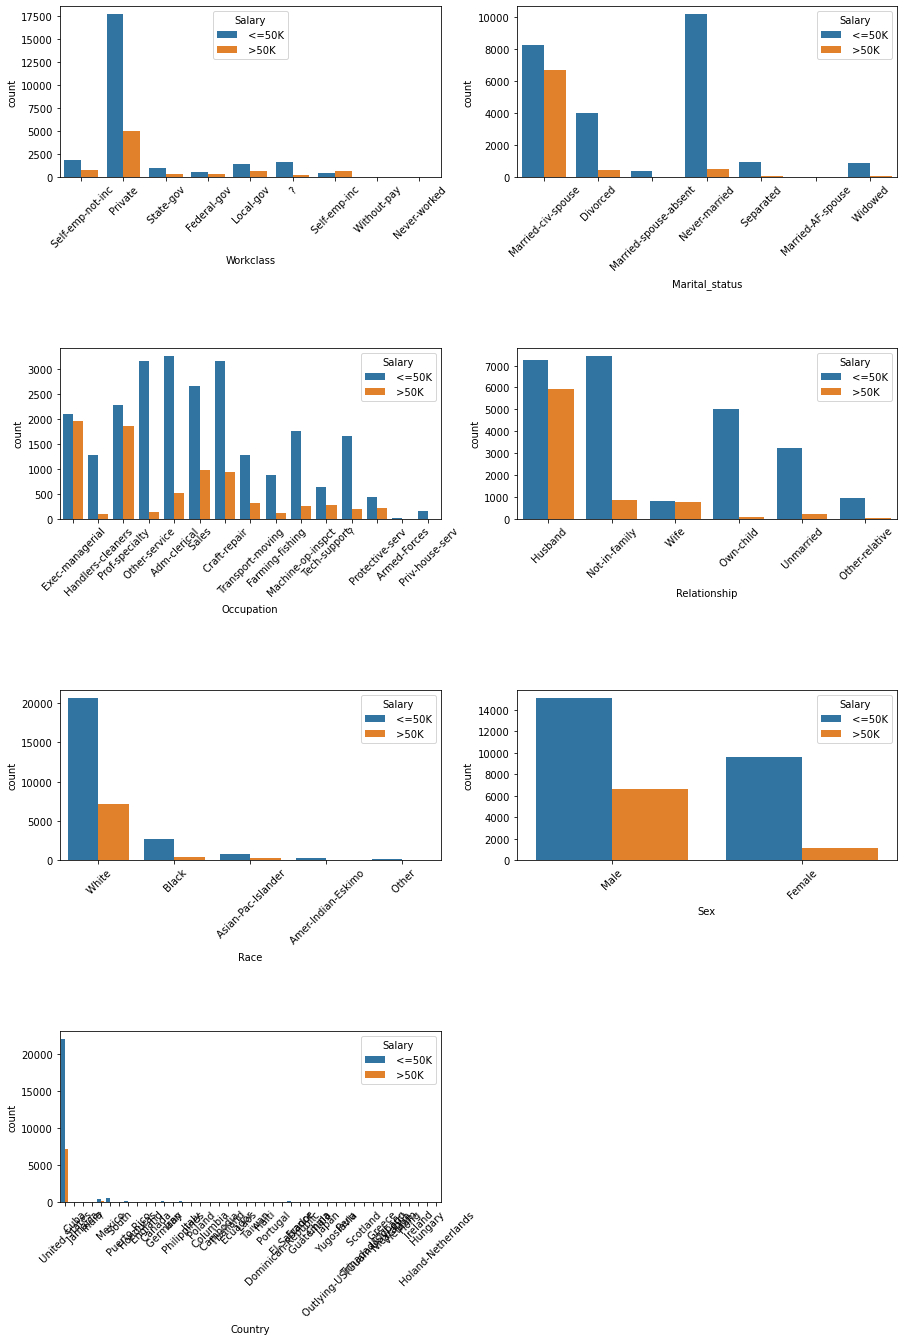

<IPython.core.display.Javascript object>

In [18]:
fig = plt.subplots(figsize=(15, 22))
for i, j in enumerate(feat):
    plt.subplot(4, 2, i + 1)
    plt.subplots_adjust(hspace=1.0)
    plt.xticks(rotation=45)
    sns.countplot(x=j, data=data_cat, hue="Salary")

Noticed the ? value in the Workclass, Country and Occupation column 
### data["Workclass"].value_counts()
Then replacing it with 'Unknown'

In [19]:
remove_weird_values(data=data, column="Workclass", first=[" ?"], sec="Unknown")

<IPython.core.display.Javascript object>

In [20]:
remove_weird_values(data=data, column="Country", first=[" ?", " South"], sec="Unknown")

<IPython.core.display.Javascript object>

In [21]:
remove_weird_values(data=data, column="Country", first=[" Hong"], sec="China")

<IPython.core.display.Javascript object>

In [22]:
remove_weird_values(data=data, column="Occupation", first=[" ?"], sec="Unknown")

<IPython.core.display.Javascript object>

In [23]:
# Joining the two least values; 'Without_pay and Never_worked' since they are both similar

keep = [
    " Self-emp-not-inc",
    " Private",
    " State-gov",
    " Federal-gov",
    " Local-gov",
    "Unknown",
    " Self-emp-inc",
]
replace = "Others"

join_values_in_a_column(data=data, column="Workclass", keep=keep, replace=replace)

<IPython.core.display.Javascript object>

In [24]:
discretize_feature(data=data, feature="Age", num_bins=3, labels=False).value_counts()

0    11446
1    10734
2    10356
Name: Age, dtype: int64

<IPython.core.display.Javascript object>

In [25]:
discretize_feature(
    data=data, feature="Hours_per_week", num_bins=5, labels=False
).value_counts()

1    16086
0     6874
3     6488
2     3088
Name: Hours_per_week, dtype: int64

<IPython.core.display.Javascript object>

In [26]:
data_num.corr()

,Age,Final_weight,Education_num,Capital_gain,Capital_loss,Hours_per_week
Age,1.000000,-0.076448,0.036224,0.077676,0.057745,0.068515
Final_weight,-0.076448,1.000000,-0.043353,0.000433,-0.010267,-0.018900
Education_num,0.036224,-0.043353,1.000000,0.122661,0.079901,0.148426
Capital_gain,0.077676,0.000433,0.122661,1.000000,-0.031638,0.078408
Capital_loss,0.057745,-0.010267,0.079901,-0.031638,1.000000,0.054229
Hours_per_week,0.068515,-0.018900,0.148426,0.078408,0.054229,1.000000


<IPython.core.display.Javascript object>

There is little correlation between features in the dataset, it can be challenging to identify the most relevant features for a predictive model.

In [27]:
# Split the data

from sklearn.model_selection import train_test_split


RANDOM_STATE, TEST_SIZE = 5, 0.2
TARGET = "Salary"

X = data.drop(columns=TARGET)
y = data[TARGET]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE
)

X_train.shape, X_test.shape

((26028, 13), (6508, 13))

<IPython.core.display.Javascript object>

In [28]:
X_test.head(2)

,Age,Workclass,Final_weight,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Country
27298,1,Self-emp-not-inc,327164,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,3,Unknown
9740,0,Private,275110,9,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,3,United-States


<IPython.core.display.Javascript object>

In [29]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler


vars_to_scale = ["Age", "Final_weight", "Education_num"]
vars_to_encode = [
    "Workclass",
    "Marital_status",
    "Occupation",
    "Relationship",
    "Race",
    "Sex",
    "Country",
]

# >>>>>OHE>>>>>
ohe = OneHotEncoder(dtype=int, handle_unknown="ignore")

# >>>>>Scaler>>>>>
scaler = MinMaxScaler()

col_transformer = ColumnTransformer(
    transformers=[("ohe", ohe, vars_to_encode), ("Scaler", scaler, vars_to_scale)],
)

col_transformer

ColumnTransformer(transformers=[('ohe',
                                 OneHotEncoder(dtype=<class 'int'>,
                                               handle_unknown='ignore'),
                                 ['Workclass', 'Marital_status', 'Occupation',
                                  'Relationship', 'Race', 'Sex', 'Country']),
                                ('Scaler', MinMaxScaler(),
                                 ['Age', 'Final_weight', 'Education_num'])])

<IPython.core.display.Javascript object>

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Init
logit = LogisticRegression(random_state=RANDOM_STATE, solver="lbfgs", max_iter=200)

pipe_logit = Pipeline(steps=[("col_transformer", col_transformer), ("logit", logit),])

pipe_logit

Pipeline(steps=[('col_transformer',
                 ColumnTransformer(transformers=[('ohe',
                                                  OneHotEncoder(dtype=<class 'int'>,
                                                                handle_unknown='ignore'),
                                                  ['Workclass',
                                                   'Marital_status',
                                                   'Occupation', 'Relationship',
                                                   'Race', 'Sex', 'Country']),
                                                 ('Scaler', MinMaxScaler(),
                                                  ['Age', 'Final_weight',
                                                   'Education_num'])])),
                ('logit', LogisticRegression(max_iter=200, random_state=5))])

<IPython.core.display.Javascript object>

In [31]:
# Fit
pipe_logit.fit(X_train, y_train)

# Make predictions
y_pred_1 = pipe_logit.predict(X_test)

# Probability of earning
y_proba_1 = pipe_logit.predict_proba(X_test)[:, 1]

<IPython.core.display.Javascript object>

In [32]:
np.mean(y_test == y_pred_1)

0.8363552550706822

<IPython.core.display.Javascript object>

In [33]:
conf_matrix = metrics.confusion_matrix(y_true=y_test, y_pred=y_pred_1)
conf_matrix

array([[4567,  377],
       [ 688,  876]], dtype=int64)

<IPython.core.display.Javascript object>

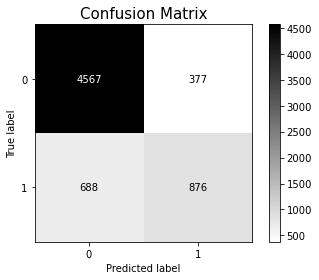

<IPython.core.display.Javascript object>

In [34]:
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=conf_matrix)

# Display Confusion Matrix
disp.plot(cmap=plt.cm.gray_r)
plt.title("Confusion Matrix", size=15)
plt.show()

In [35]:
# The accuracy is 84%

clf_report = metrics.classification_report(y_true=y_test, y_pred=y_pred_1)

print(clf_report)

              precision    recall  f1-score   support

       <=50K       0.87      0.92      0.90      4944
        >50K       0.70      0.56      0.62      1564

    accuracy                           0.84      6508
   macro avg       0.78      0.74      0.76      6508
weighted avg       0.83      0.84      0.83      6508



<IPython.core.display.Javascript object>

In [36]:
# Trying the DecisionTreeClassifier to check for better accuracy

from sklearn.tree import DecisionTreeClassifier

# Init
dec = DecisionTreeClassifier(random_state=RANDOM_STATE)

pipe_dec_tree = Pipeline(steps=[("col_transformer", col_transformer), ("dec", dec),])

pipe_dec_tree

Pipeline(steps=[('col_transformer',
                 ColumnTransformer(transformers=[('ohe',
                                                  OneHotEncoder(dtype=<class 'int'>,
                                                                handle_unknown='ignore'),
                                                  ['Workclass',
                                                   'Marital_status',
                                                   'Occupation', 'Relationship',
                                                   'Race', 'Sex', 'Country']),
                                                 ('Scaler', MinMaxScaler(),
                                                  ['Age', 'Final_weight',
                                                   'Education_num'])])),
                ('dec', DecisionTreeClassifier(random_state=5))])

<IPython.core.display.Javascript object>

In [37]:
# Fit
pipe_dec_tree.fit(X_train, y_train)

# Make predictions
y_pred_2 = pipe_dec_tree.predict(X_test)

# Probability of Class
y_proba_2 = pipe_dec_tree.predict_proba(X_test)[:, 1]

<IPython.core.display.Javascript object>

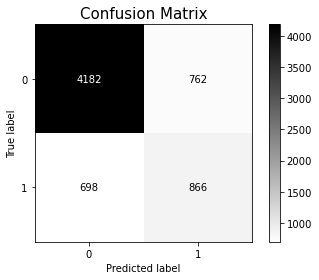

<IPython.core.display.Javascript object>

In [38]:
conf_matrix = metrics.confusion_matrix(y_true=y_test, y_pred=y_pred_2)
conf_matrix

disp = metrics.ConfusionMatrixDisplay(confusion_matrix=conf_matrix)

# Display Confusion Matrix
disp.plot(cmap=plt.cm.gray_r)
plt.title("Confusion Matrix", size=15)
plt.show()

In [39]:
np.mean(y_test == y_pred_2)

0.775660725261217

<IPython.core.display.Javascript object>

In [40]:
# The accuracy is 78%, not bad but not too good

clf_report = metrics.classification_report(y_true=y_test, y_pred=y_pred_2)

print(clf_report)

              precision    recall  f1-score   support

       <=50K       0.86      0.85      0.85      4944
        >50K       0.53      0.55      0.54      1564

    accuracy                           0.78      6508
   macro avg       0.69      0.70      0.70      6508
weighted avg       0.78      0.78      0.78      6508



<IPython.core.display.Javascript object>